# Loading Libraries & Data

In [173]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [174]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/store.csv')

In [176]:
# Check uploaded files in Colab
import os

os.listdir('/content')


['.config',
 'drive',
 'heatmap.png',
 'train (1).csv',
 'store (1).csv',
 'store.csv',
 'sample_submission.csv',
 'test (1).csv',
 'Screenshot 2025-10-25 203527.png',
 'Screenshot 2025-10-25 195927.png',
 'test.csv',
 'Screenshot 2025-10-25 210321.png',
 'sample_submission (1).csv',
 'train.csv',
 'sample_data']

In [177]:
from google.colab import files
uploaded = files.upload()


Saving sample_submission.csv to sample_submission (2).csv
Saving store.csv to store (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [178]:
import pandas as pd

train_df = pd.read_csv('/content/train.csv', low_memory=False)
train_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [179]:
store_df = pd.read_csv('/content/store.csv')
store_df.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [180]:
rossman_df = pd.merge(train_df, store_df, on='Store', how='left')
rossman_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [181]:
os.listdir('/content/')

['.config',
 'drive',
 'heatmap.png',
 'test (2).csv',
 'train (1).csv',
 'store (1).csv',
 'store.csv',
 'sample_submission.csv',
 'test (1).csv',
 'Screenshot 2025-10-25 203527.png',
 'Screenshot 2025-10-25 195927.png',
 'test.csv',
 'store (2).csv',
 'Screenshot 2025-10-25 210321.png',
 'train (2).csv',
 'sample_submission (2).csv',
 'sample_submission (1).csv',
 'train.csv',
 'sample_data']

In [182]:
import pandas as pd

# Load main training dataset (sales data)
train_df = pd.read_csv('/content/train.csv', low_memory=False)

# Load store details
store_df = pd.read_csv('/content/store.csv')

# Merge both on 'Store' column
rossman_df = pd.merge(train_df, store_df, on='Store', how='left')

# Preview the merged dataset
rossman_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [183]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Checking Information about Dataset

In [184]:
rossman_df.shape

(1017209, 18)

In [185]:
#Checking info of data as data types and rows and cols
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [186]:
#Checking Null Values
rossman_df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


# Summary Statastics Of Dataset

In [187]:
#Summary Statastics
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [188]:
#No. Of Stores in the Dataset
rossman_df.Store.nunique()

1115

In [189]:
# Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()

,count
StateHoliday,
0,986159
a,20260
b,6690
c,4100


In [190]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


# This tells us we have a data of almost 3 years.

In [191]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)

In [192]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31


# EDA On Rossman Dataset

**Heatmap of the Rossman Dataset**

<Axes: >

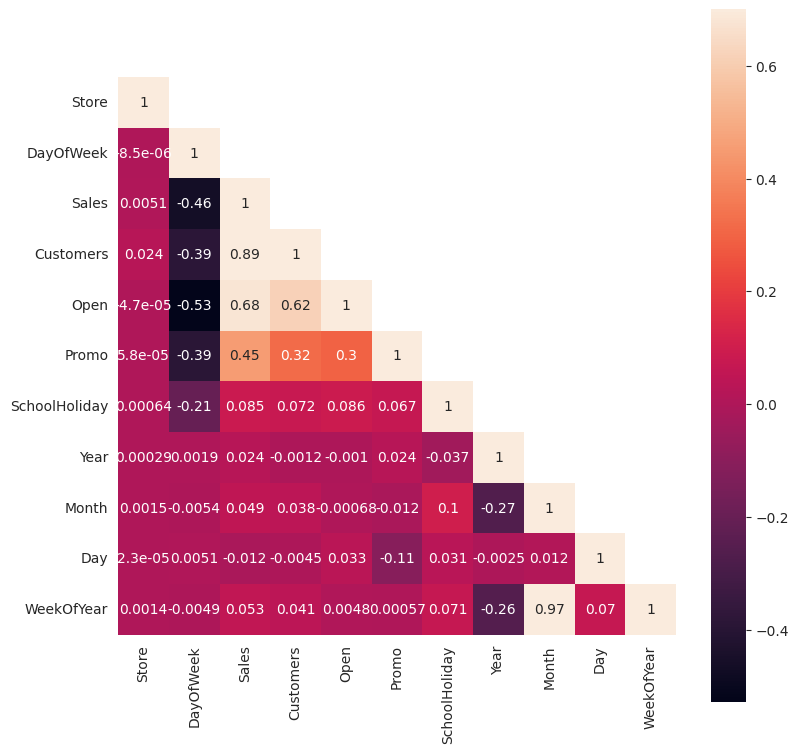

In [193]:
correlation_map = rossman_subset_df.select_dtypes(include=np.number).corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

# **As we can see that in the graph given below that Stores mainly closed on Sunday**

<Axes: xlabel='DayOfWeek', ylabel='count'>

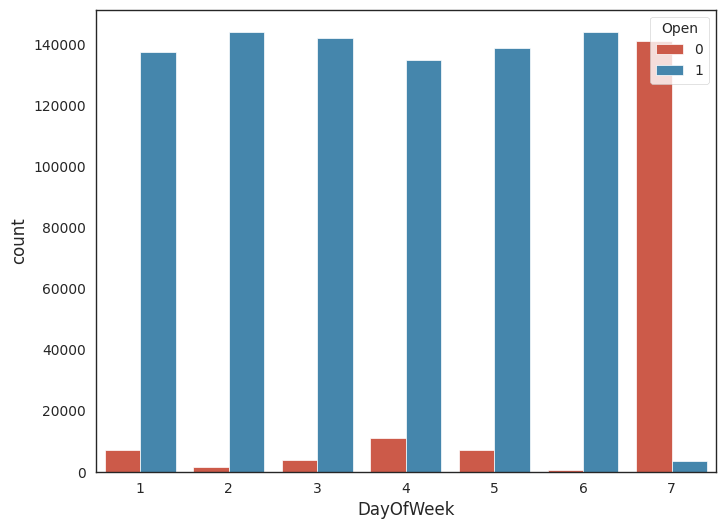

In [194]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)

**Sales Are nearly doubled High When Promo is Running**

<Axes: xlabel='Promo', ylabel='Sales'>

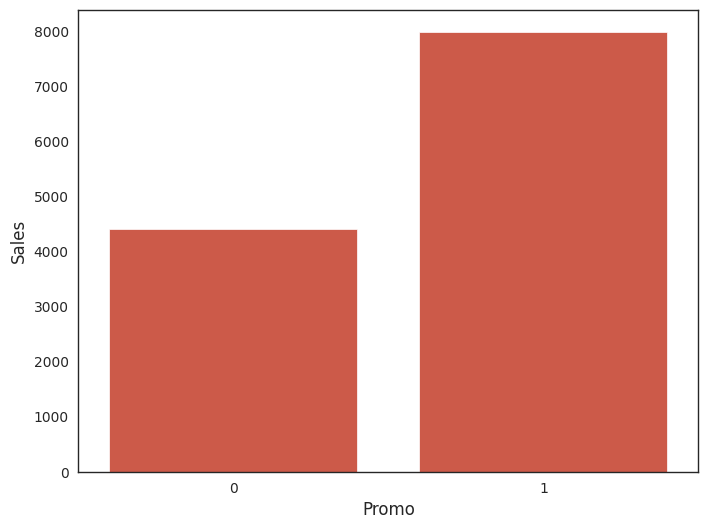

In [195]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve**

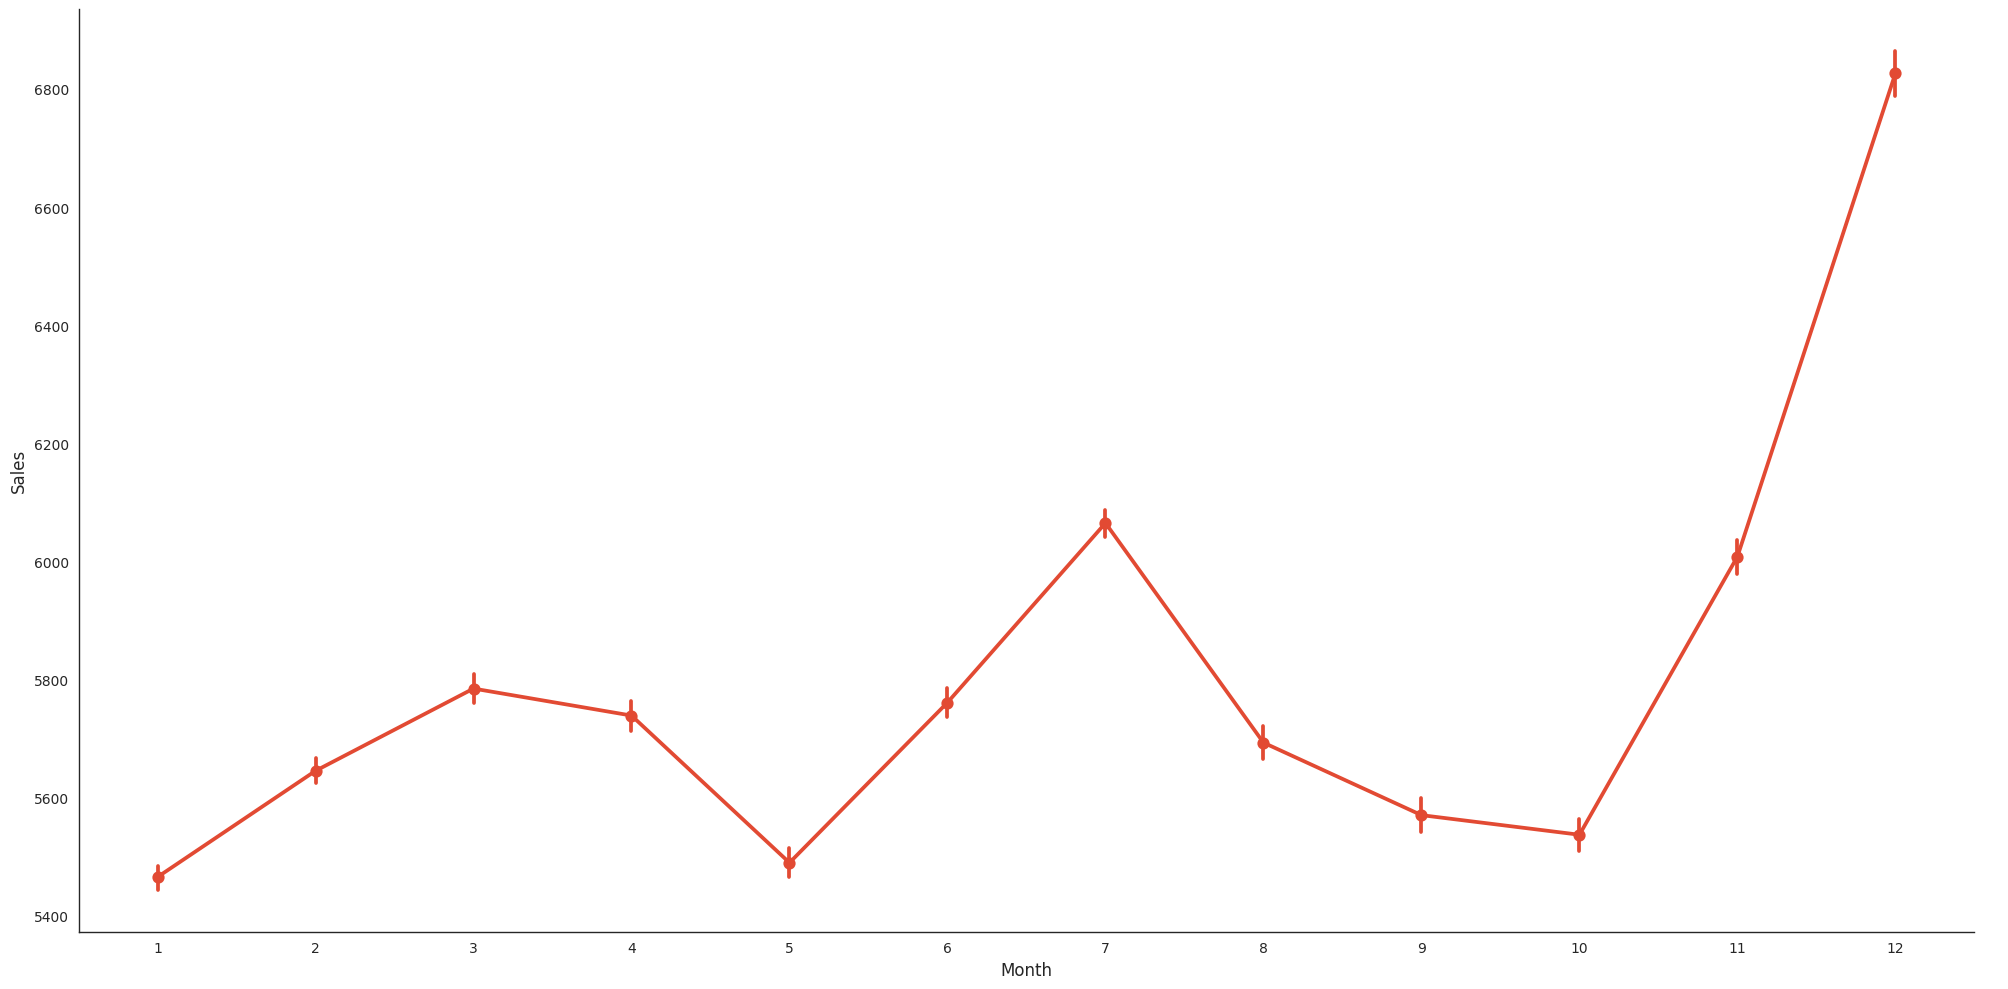

In [196]:
sns.catplot(x="Month" ,y = "Sales" , data=rossman_df, kind="point", aspect=2,height=10)

In [197]:
# Value Counts of SchoolHoliday Column
rossman_df.SchoolHoliday.value_counts()

,count
SchoolHoliday,
0,835488
1,181721


**As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday**

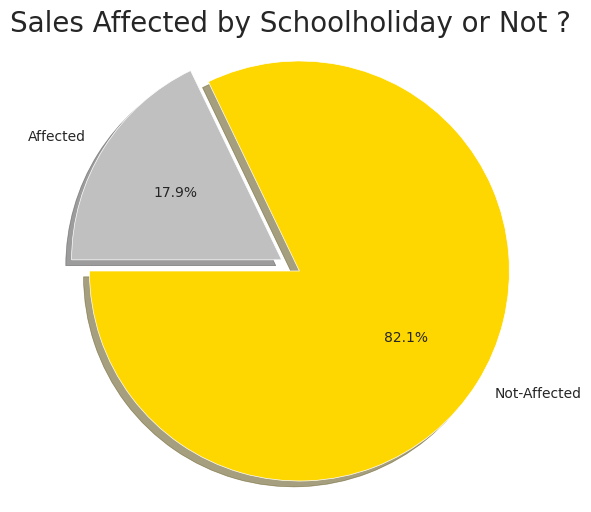

In [198]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# **Transforming Variable StateHoliday**

In [199]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [200]:
rossman_df.StateHoliday.value_counts()

,count
StateHoliday,
0,986159
1,31050


**As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday**

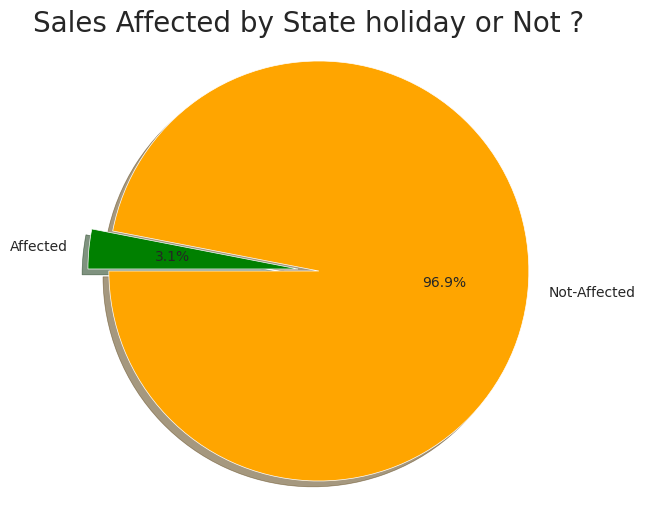

In [201]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**As Sales isn't much affected by State Holiday so i'm removing this column**

In [202]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)

**Histogram Representation of Sales. Here 0 is showing because most of the time store was closed**

/tmp/ipython-input-2144428938.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rossman_df['Sales'], kde = False,bins=40);


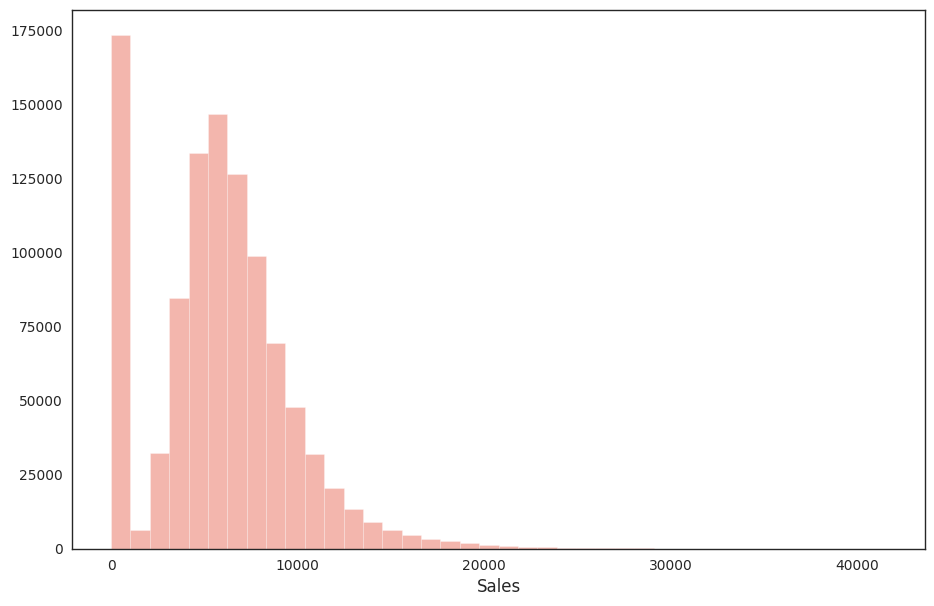

In [203]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rossman_df['Sales'], kde = False,bins=40);

# **Sales vs Customers**

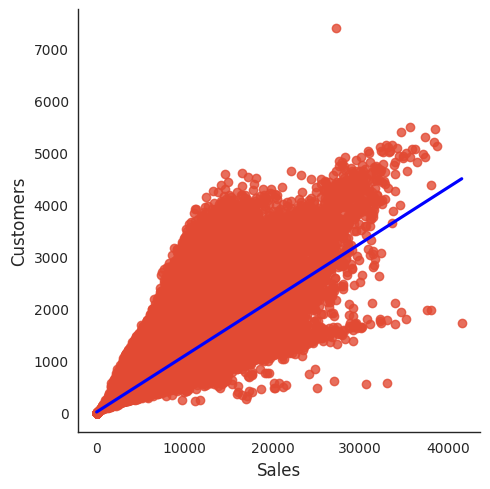

In [204]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

# Analysing the Store Dataset

In [205]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [206]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


**Checking Information about Dataset**

In [207]:
store_df.shape

(1115, 10)

In [208]:
#Checking info of data as data types and rows and cols
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [209]:
#Checking Null Values
store_df.isnull().sum()

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,354
CompetitionOpenSinceYear,354
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


# Heatmap for null values

<Axes: >

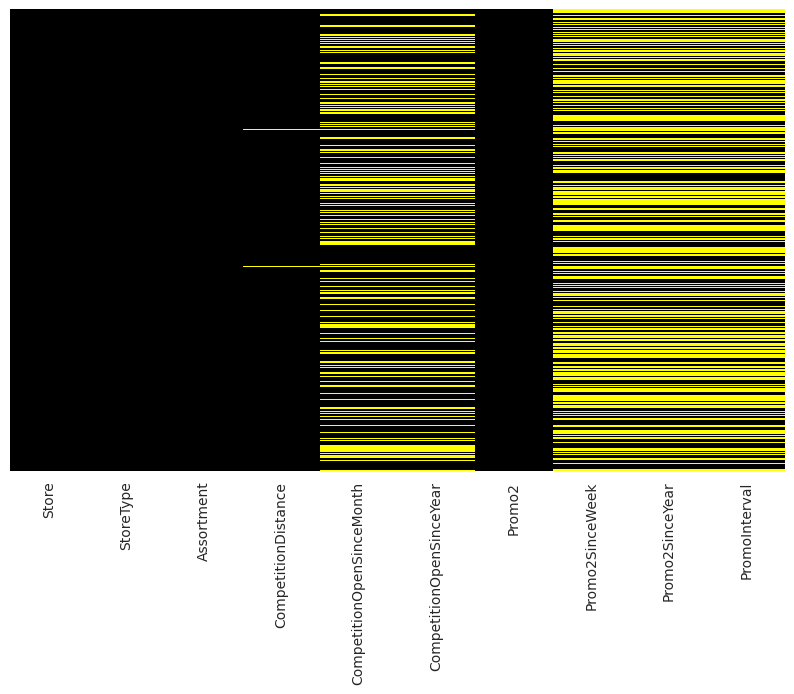

In [210]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

**Distribution Of Different Store Types**

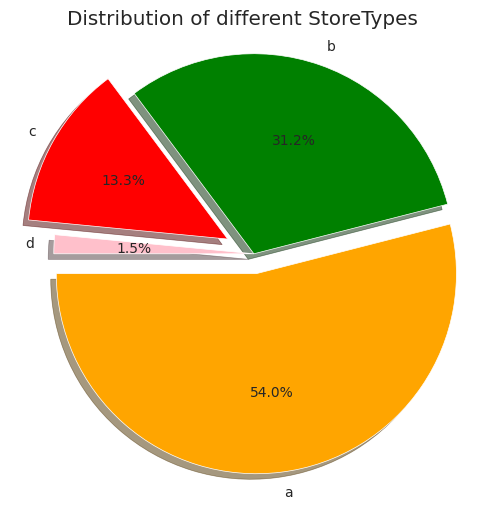

In [211]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# **Remove features with high percentages of missing values**
**we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values**.

In [212]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

**Replace missing values in features with low percentages of missing values**

/tmp/ipython-input-2517642525.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

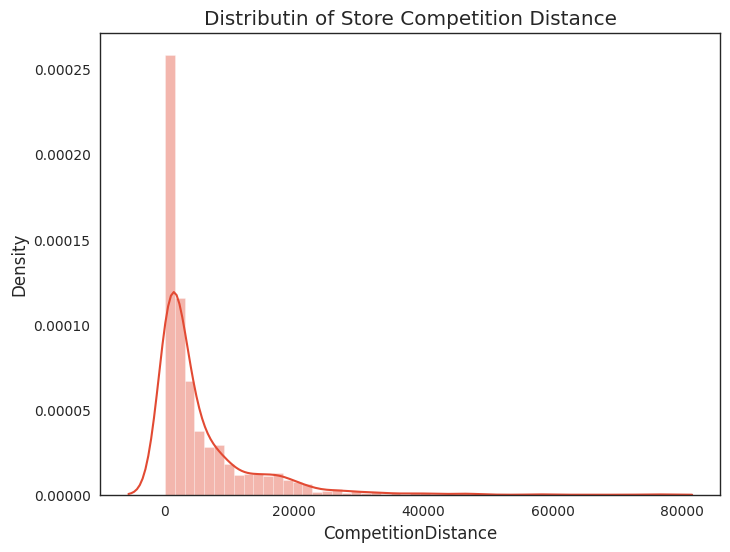

In [213]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

**The distribution is right skewed, so we'll replace missing values with the median.**

In [214]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

/tmp/ipython-input-2781003425.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)


# **Pairplot for Store Dataset**

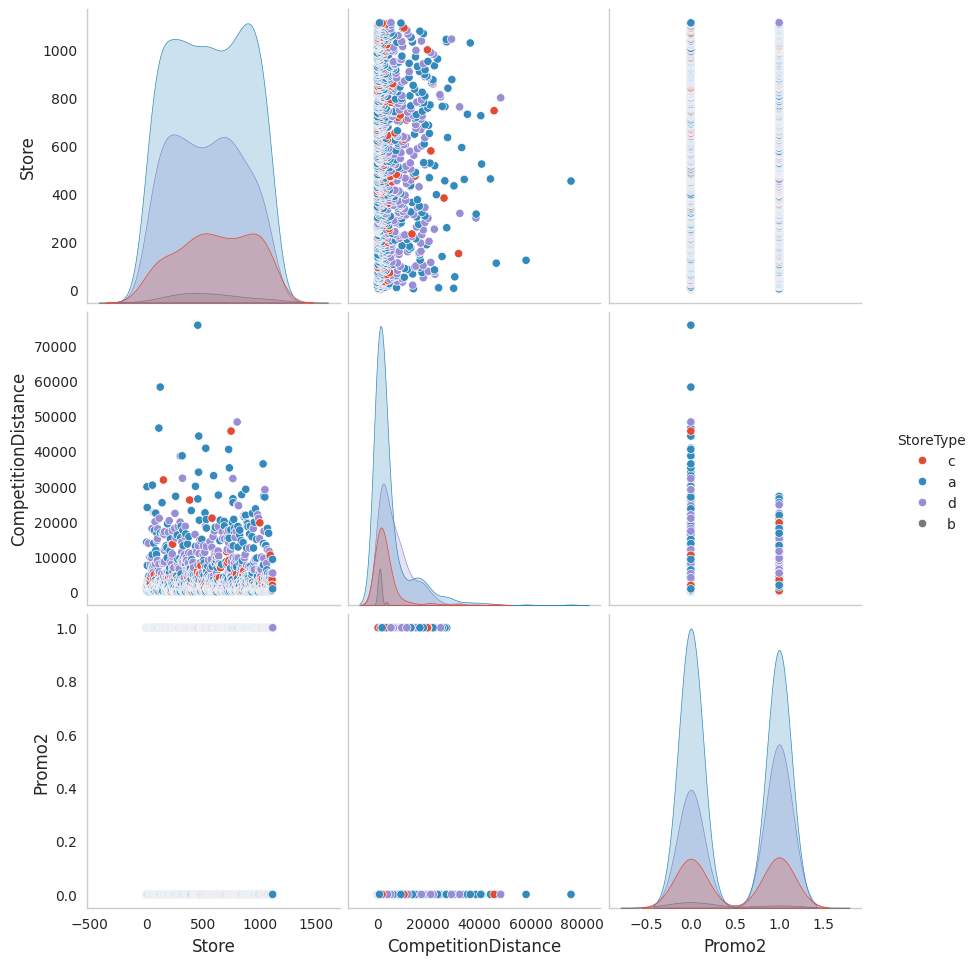

In [215]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

**Checking stores with their assortment type**

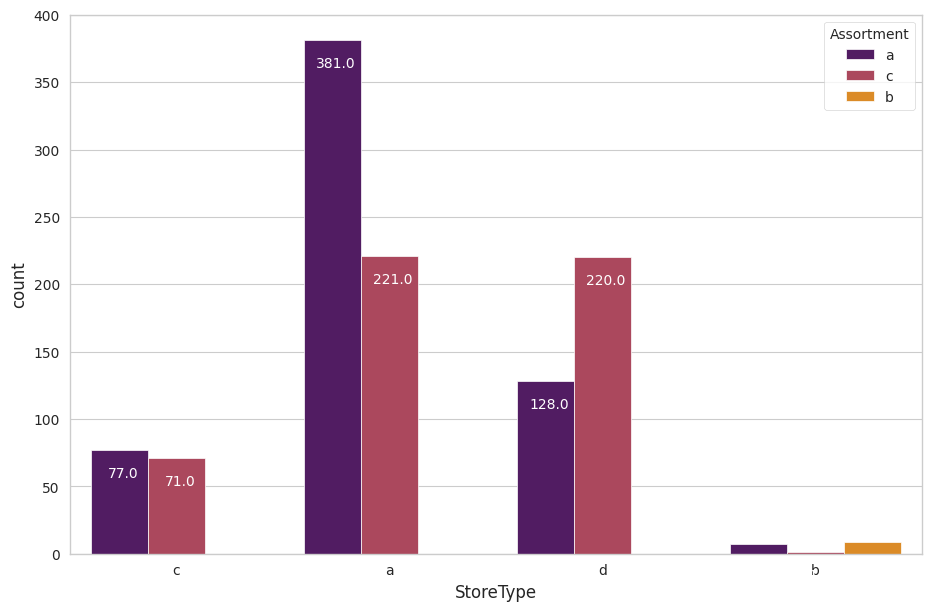

In [216]:
#checking stores with their assortment type
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

**We can see that there is not such significant differences in these 3 years in terms of sales.**

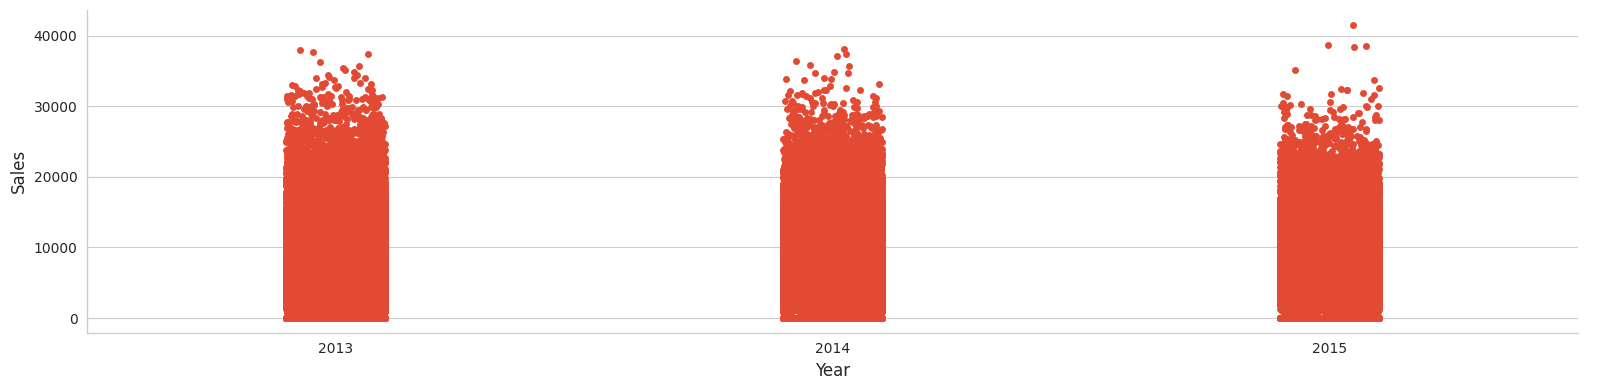

In [217]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 );

# **Merging Two Datasets**

In [218]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType_x,Assortment_x,...,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear,StoreType_y,Assortment_y,CompetitionDistance_y,Promo2_y
0,1,5,2015-07-31,5263,555,1,1,1,c,a,...,NaN,NaN,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,a,a,...,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,a,a,...,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,c,c,...,NaN,NaN,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,a,a,...,NaN,NaN,2015,7,31,31,a,a,29910.0,0


In [219]:
df.shape


(1017209, 25)

# **EDA On Merged Dataset**

**Heatmap Of Merged Dataset**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

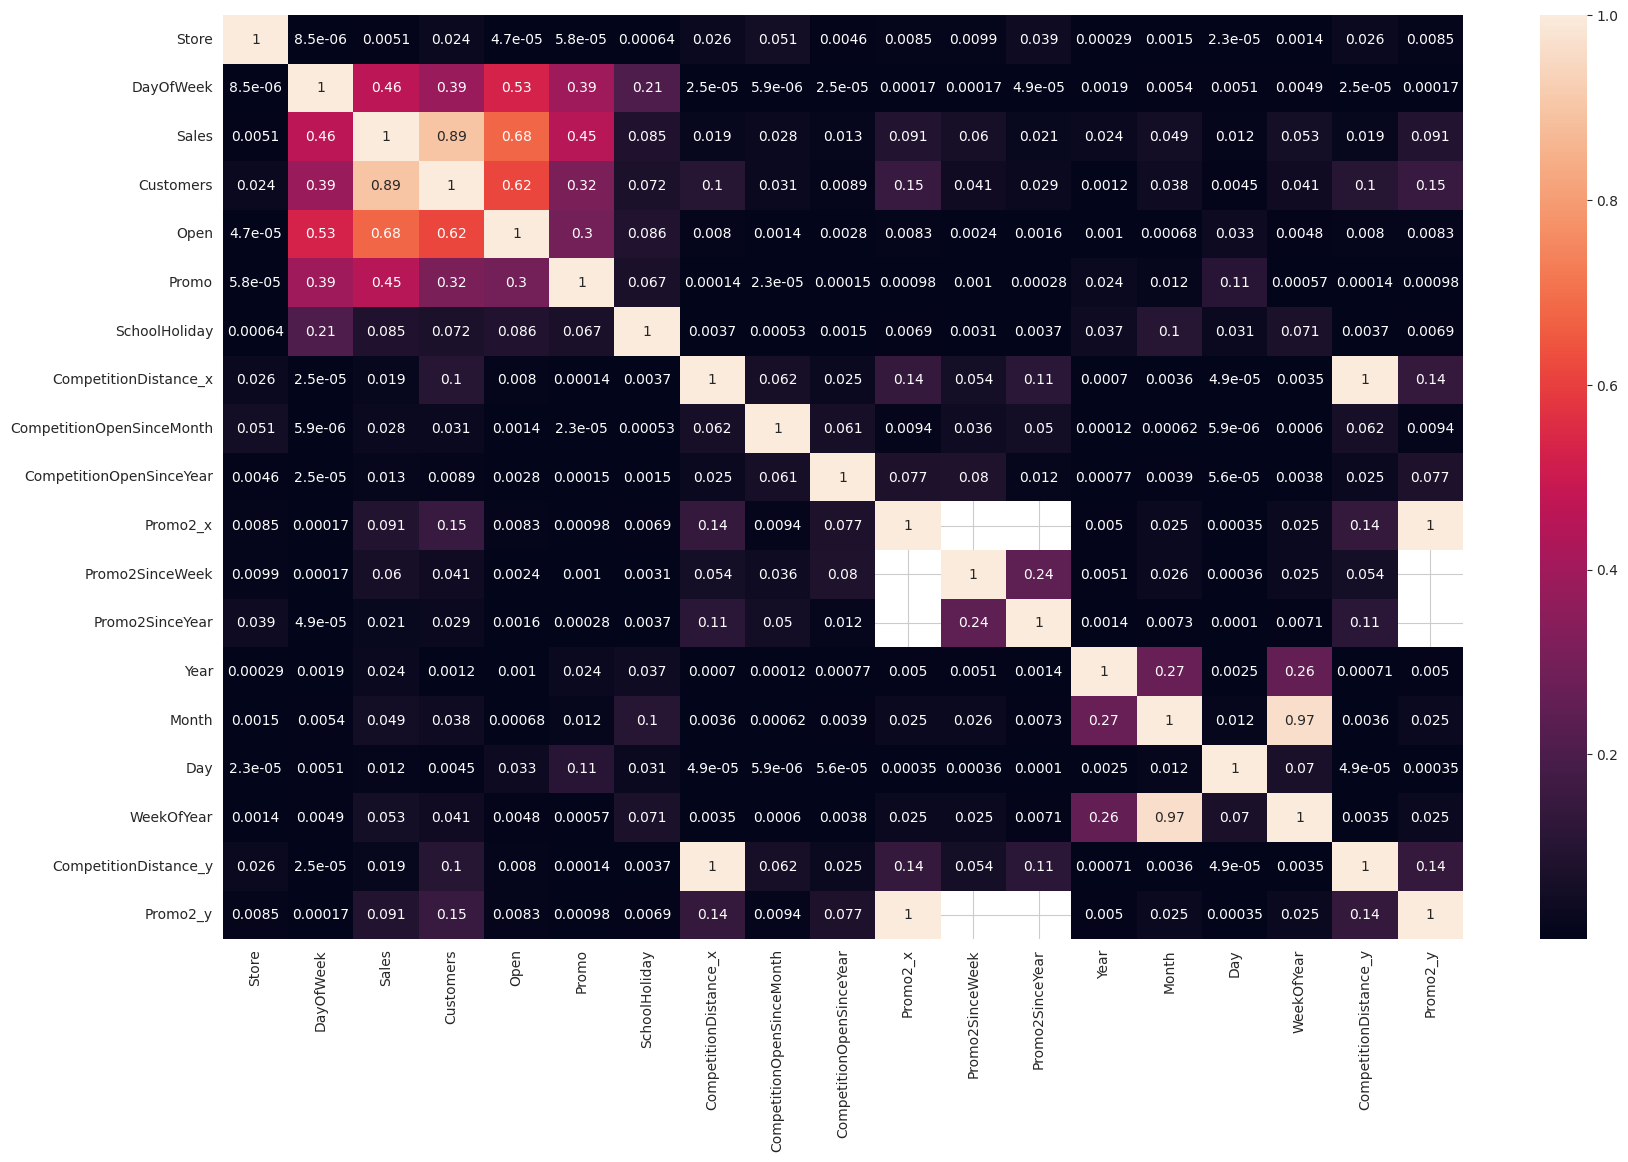

In [220]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.select_dtypes(include=np.number).corr().abs(), annot=True)
plt.savefig("heatmap.png")

from google.colab import files
files.download('heatmap.png') # this line opens your documents in your pc to save your png

In [221]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

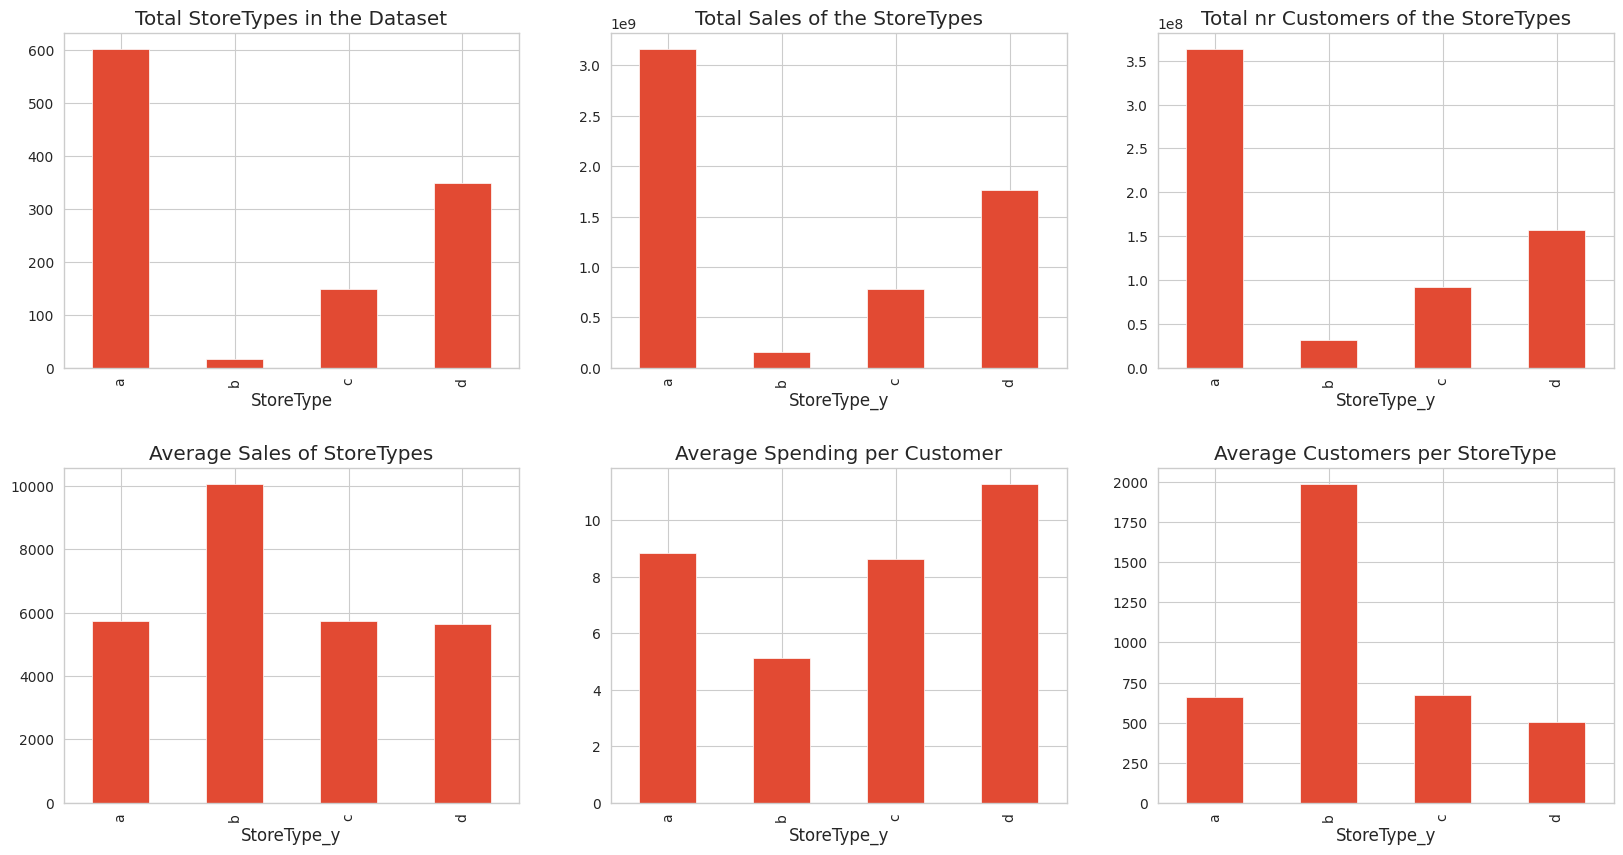

In [222]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType_y")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType_y")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType_y")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType_y")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType_y")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customer**s.

# **Lets go ahead with the promotions**

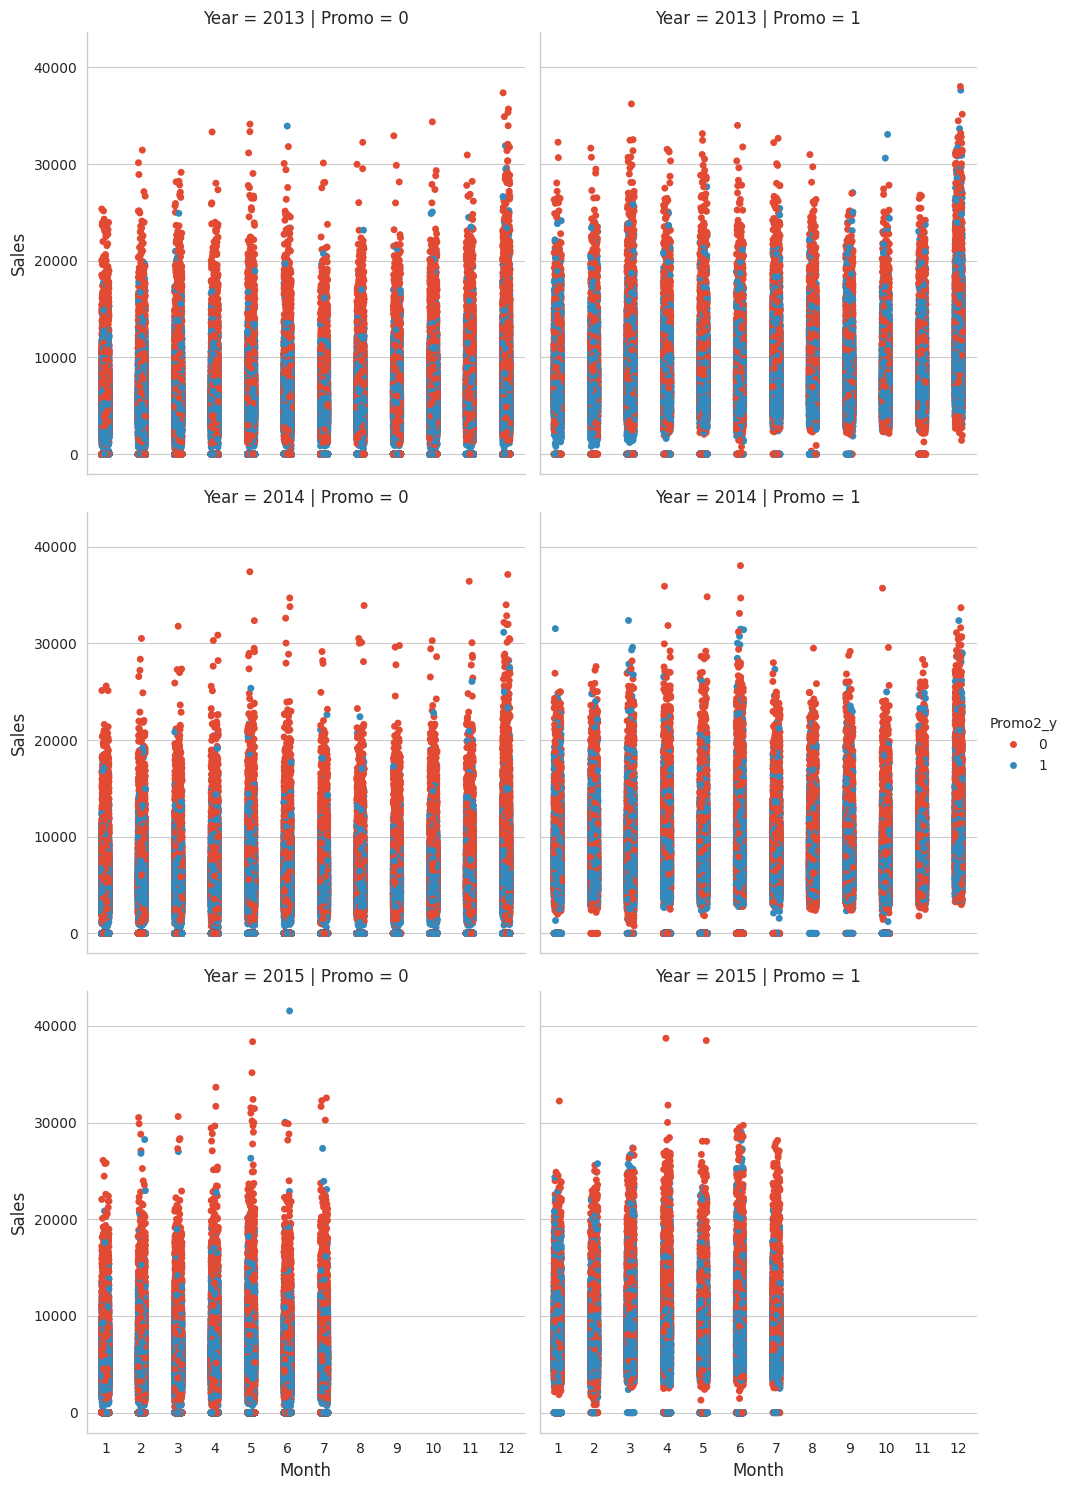

In [223]:
sns.catplot(data = df, x ="Month", y = "Sales",
               col = 'Promo', # per store type in cols
               hue = 'Promo2_y',
               row = "Year"
             )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.

**As We can see that when the promo is running Sales are high**

/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:123: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


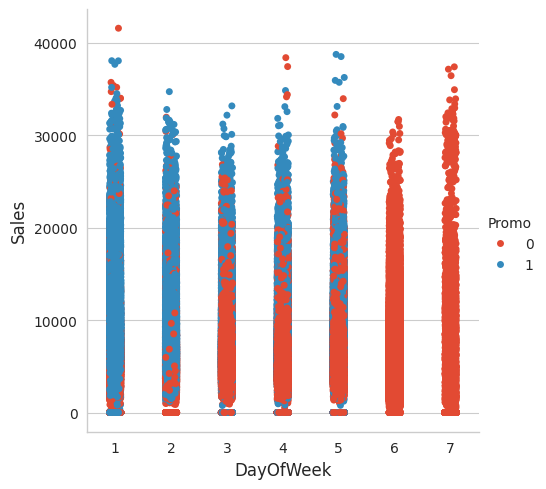

In [224]:
sns.catplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

In [225]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion.
The Sales are going crazy on Sunday. No wonder.""")
print("There are", df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")

So, no promotion in the weekend. However, the sales are very high, if the stores have promotion. 
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opend on sundays


**Let's see the trends on a yearly basis**.

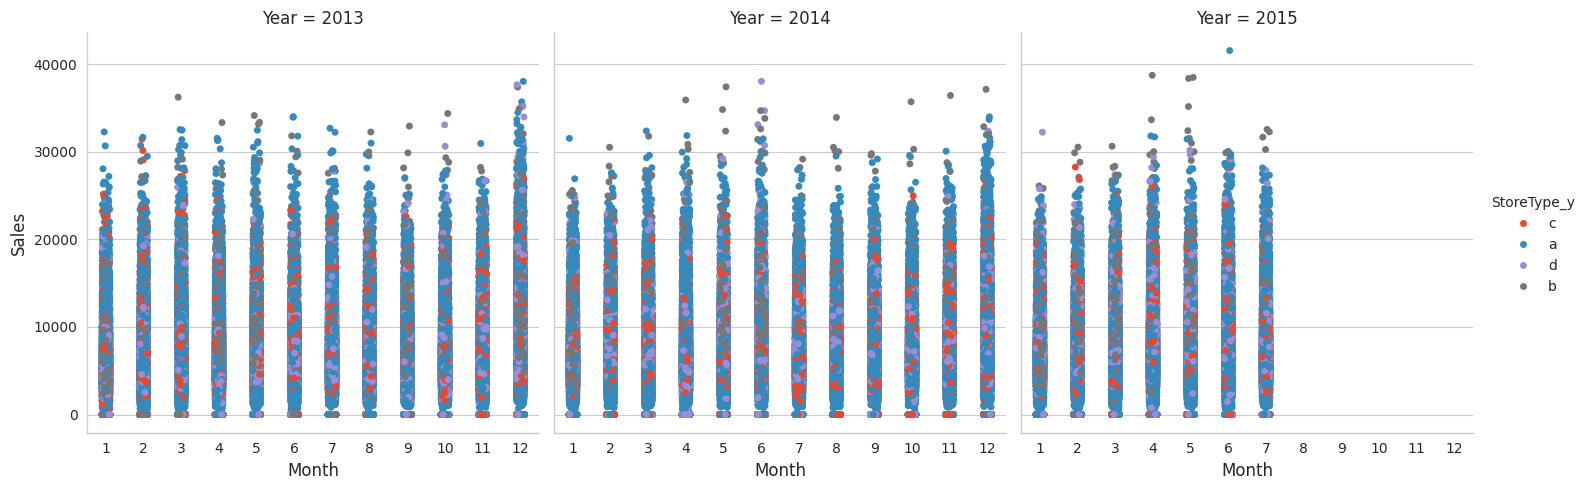

In [226]:
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType_y")
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly.

**What about the Competition Distance. What kind of inpact does this have on the sales**

In [227]:
df.CompetitionDistance_y.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance_y"], 5)

/tmp/ipython-input-2097891435.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
/tmp/ipython-input-2097891435.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])


<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

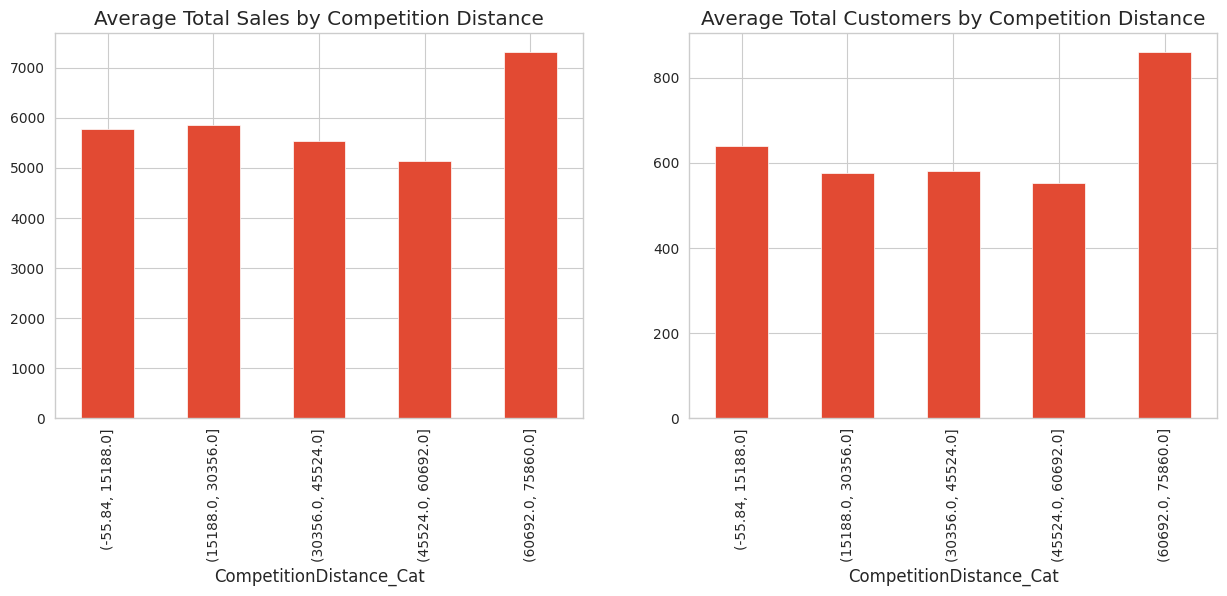

In [228]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [229]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

***Box plot shows that we have a very high outliers in sales***

<Axes: ylabel='Sales'>

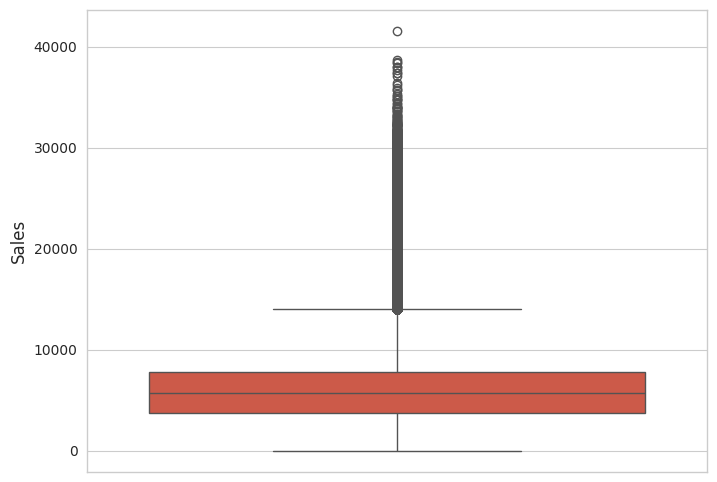

In [230]:
#checking outliers in sales
sns.boxplot(rossman_df['Sales'])

**Removing Outliers Of Sales Column**

In [231]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [232]:
# defining new variable after removing outliers
df= remove_outlier(df, 'Sales')

# **Conclusion of the analysis:**

**Sales are highly correlated to number of Customers**.

**The most selling and crowded store type is A**.

**StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things**.

**StoreTybe D had the highest buyer cart**.

**Promo runs only in weekdays**.

**For all stores, Promotion leads to increase in Sales and Customers both**.

**More stores are opened during School holidays than State holidays**.

**The stores which are opened during School Holiday have more sales than normal days**.

**Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration**.

**Promo2 doesnt seems to be correlated to any significant change in the sales amount**.

**Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null**.

# **Drop Subsets Of Data Where Might Cause Bias**

In [233]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [234]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [235]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

np.int64(31460)

In [236]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

np.float64(0.0)

In [237]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [238]:
df_new=df.copy()

In [239]:
df_new = pd.get_dummies(df_new,columns=['StoreType_y','Assortment_y'])

In [240]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,StoreType_x,Assortment_x,CompetitionDistance_x,...,WeekOfYear,CompetitionDistance_y,Promo2_y,StoreType_y_a,StoreType_y_b,StoreType_y_c,StoreType_y_d,Assortment_y_a,Assortment_y_b,Assortment_y_c
0,1,5,2015-07-31,5263,555,1,1,c,a,1270.0,...,31,1270.0,0,False,False,True,False,True,False,False
1,2,5,2015-07-31,6064,625,1,1,a,a,570.0,...,31,570.0,1,True,False,False,False,True,False,False
2,3,5,2015-07-31,8314,821,1,1,a,a,14130.0,...,31,14130.0,1,True,False,False,False,True,False,False
3,4,5,2015-07-31,13995,1498,1,1,c,c,620.0,...,31,620.0,0,False,False,True,False,False,False,True
4,5,5,2015-07-31,4822,559,1,1,a,a,29910.0,...,31,29910.0,0,True,False,False,False,True,False,False


**From plot it can be sen that most of the sales have been on 1st and last day of week**

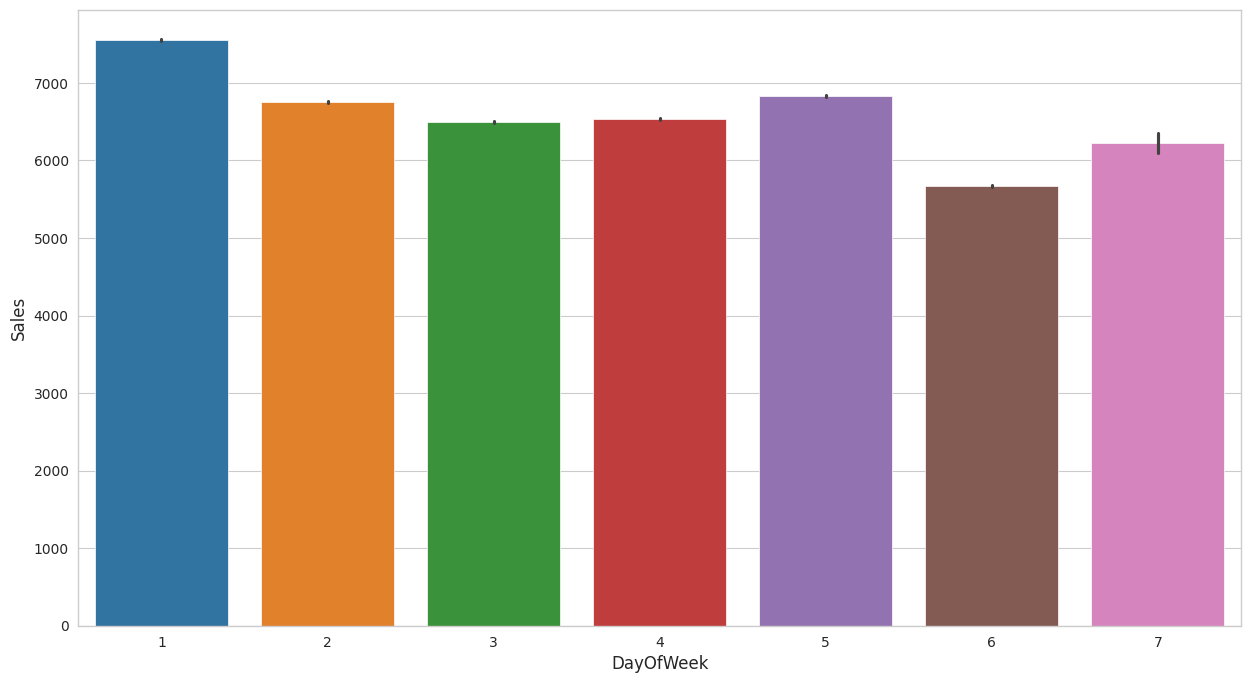

In [241]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new, hue='DayOfWeek', palette='tab10', legend=False); # Using a different color palette for distinct bars

**Setting Features and Target Variables**

In [242]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1).select_dtypes(include=np.number)
y= df_new.Sales

In [243]:
X.shape

(817644, 15)

In [244]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance_x,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2_x,Promo2SinceWeek,Promo2SinceYear,Month,Day,WeekOfYear,CompetitionDistance_y,Promo2_y
0,5,555,1,1,1270.0,9.0,2008.0,0,NaN,NaN,7,31,31,1270.0,0
1,5,625,1,1,570.0,11.0,2007.0,1,13.0,2010.0,7,31,31,570.0,1
2,5,821,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,7,31,31,14130.0,1
3,5,1498,1,1,620.0,9.0,2009.0,0,NaN,NaN,7,31,31,620.0,0
4,5,559,1,1,29910.0,4.0,2015.0,0,NaN,NaN,7,31,31,29910.0,0


In [245]:
y.head()

,Sales
0,5263
1,6064
2,8314
3,13995
4,4822


**Splitting Dataset Into Training Set and Test Set**

In [246]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [247]:
columns=X_train.columns

# **Implementing Supervised Machine Learning algorithms**.

**1. Linear Regression (OLS)**

In [248]:
# Impute missing values using the median from the training set
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

# Fit on training data and transform both training and test data
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [249]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [250]:
regressor.intercept_

np.float64(1369.8980149101299)

In [251]:
regressor.coef_

array([-2.78341859e+02,  2.49330717e+04,  1.25879653e+03,  2.46302541e+01,
        5.52470024e+04,  1.30356265e+01,  1.94905390e+02,  1.32622901e+02,
        4.31818682e+02, -4.06600278e+02,  3.84474794e+02,  1.70540666e+01,
       -1.39876714e+02, -5.27413632e+04,  1.32622901e+02])

In [252]:
y_pred_train = regressor.predict(X_train)

In [253]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [254]:
mean_squared_error(y_test, y_pred)

1974332.2914934212

In [255]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1405.1093521478751

In [256]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.6763019082726116

In [257]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.6768252110866007

In [258]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [259]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

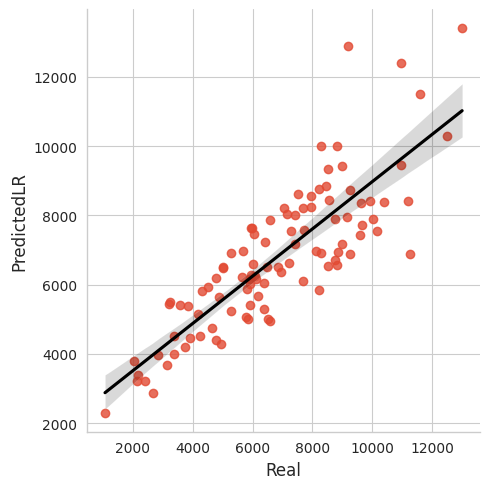

In [260]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

# **Inferences On Linear Regression Coefficients**

In [261]:
import numpy as np

print("Any NaN values? ", X.isnull().any().any())
print("Any Inf values? ", np.isinf(X).any())


Any NaN values?  True
Any Inf values?  DayOfWeek                    False
Customers                    False
Promo                        False
SchoolHoliday                False
CompetitionDistance_x        False
CompetitionOpenSinceMonth    False
CompetitionOpenSinceYear     False
Promo2_x                     False
Promo2SinceWeek              False
Promo2SinceYear              False
Month                        False
Day                          False
WeekOfYear                   False
CompetitionDistance_y        False
Promo2_y                     False
dtype: bool


In [262]:
X = X.replace([np.inf, -np.inf], np.nan)  # replace infs with NaN
X = X.dropna()
y = y.loc[X.index]  # keep y aligned with X


In [263]:
import statsmodels.api as sm

X = sm.add_constant(X)  # add intercept term
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                 6.424e+04
Date:                Sat, 25 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:41:32   Log-Likelihood:            -2.2433e+06
No. Observations:              263405   AIC:                         4.487e+06
Df Residuals:                  263392   BIC:                         4.487e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
DayOfWeek                   -24.5500      1.452    -16.910      0.000     -27.395     -21.705
Customers                     7.1410      0.010    744.170      0.000       7.122       7.160
Promo                      1188.6924      5.126    231.879      0.000    1178.645    1198.740
SchoolHoliday                27.6524      6.177      4.477      0.000      15.546      39.759
CompetitionDistance_x         0.0386      0.000    166.326      0.000       0.038       0.039
CompetitionOpenSinceMonth   -13.3868      0.729    -18.356      0.000     -14.816     -11.957
CompetitionOpenSinceYear      0.3237      0.319      1.014      0.310      -0.302       0.949
Promo2_x                   2.048e+04   1482.415     13.814      0.000    1.76e+04    2.34e+04
Promo2SinceWeek              13.9468      0.176     79.407      0.000      13.603      14.291
Promo2SinceYear             -20.4080      1.439    -14.181      0.000     -23.229     -17.587
Month                        29.8245      2.716     10.980      0.000      24.501      35.148
Day                           2.6822      0.281      9.555      0.000       2.132       3.232
WeekOfYear                   -2.7974      0.626     -4.470      0.000      -4.024      -1.571
CompetitionDistance_y         0.0386      0.000    166.327      0.000       0.038       0.039
Promo2_y                   2.048e+04   1482.415     13.814      0.000    1.76e+04    2.34e+04
==============================================================================
Omnibus:                    23583.290   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36695.736
Skew:                           0.683   Prob(JB):                         0.00
Kurtosis:                       4.215   Cond. No.                     6.74e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.5e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# **2. LARS Lasso Regression**

In [264]:
las = LassoLars(alpha=0.3, fit_intercept=False, eps=1e-8) # Increased eps significantly
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 6 iterations, i.e. alpha=2.259e+01, with an active set of 6 regressors, and the smallest cholesky pivot element being 1.000e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 7 iterations, i.e. alpha=1.897e+01, with an active set of 7 regressors, and the smallest cholesky pivot element being 1.000e-08. Reduce max_iter or increase eps parameters.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_least_angle.py:723: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 13 iterations, i.e. alpha=4.071e+00, with an active set of 11 regressors, and the smallest cholesky pivot element being

In [265]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.6745711263708667 , Out of Sample Test Score : 0.6752120028873807
Training RMSE : 1407.181872479882 Testing RMSE : 1408.6119648214756
Training MAPE : 17.440757611888866 Testing MAPE : 17.48073833120985


# **3. Decision Tree Regression**

In [266]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)

In [267]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.99999951577043 , Test Score : 0.925129932311614
Training RMSE : 1.7165159514097288 Testing RMSE : 676.3095193456807
Training MAPE : 0.0001787583576059016 Testing MAPE : 7.232044667341995


**Decision Tree With Hyper Parameter Tuning**

In [268]:
# #another script that takes toooo long, to find the right parameters for tree
# tree = DecisionTreeRegressor()

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

**I trained Model with hyper parameters**..**to not run everytime i record the result**

**Here are our best parameters for Decision Tree**

{ **min_samples_split=5 **,min_samples_leaf=8 }

In [269]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [270]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9652743342853287 , Test Score : 0.9387487956669791
Training RMSE : 459.67139675390007 Testing RMSE : 611.7143993453914
Training MAPE : 4.814218256502706 Testing MAPE : 6.426935378519112


In [271]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [272]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

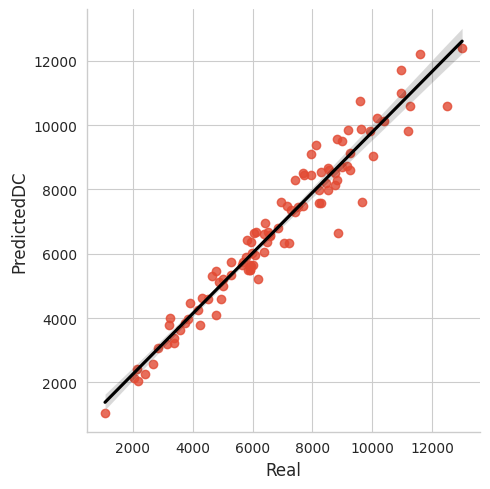

In [273]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

# **4. Support Vector Regression**

In [274]:
#%%time
#from sklearn.svm import SVR
#svr=SVR()
#svr_reg=svr.fit(X_train,y_train)
#svr

In [275]:
#print("Regresion Model Score" , ":" , svr_reg.score(X_train, y_train) , "," ,
#      "Out of Sample Test Score" ,":" , svr_reg.score(X_test, y_test))

#y_predicted = svr_reg.predict(X_train)
#y_test_predicted = svr_reg.predict(X_test)

#print("Training RMSE", ":", rmse(y_train, y_predicted),
#      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
#print("Training MAPE", ":", mape(y_train, y_predicted),
#      "Testing MAPE", ":", mape(y_test, y_test_predicted))

# **5. K-Nearest Neighbors Regression**

In [172]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

In [ ]:
# Evaluate model performance
train_score = knnreg.score(X_train, y_train)
test_score = knnreg.score(X_test, y_test)

# Predictions
y_pred_train = knnreg.predict(X_train)
y_pred_test = knnreg.predict(X_test)

# Metrics
train_rmse = rmse(y_train, y_pred_train)
test_rmse = rmse(y_test, y_pred_test)

train_mape = mape(y_train, y_pred_train)
test_mape = mape(y_test, y_pred_test)

# Final neatly formatted output
print(f"Regression Model Score : {train_score:.6f} , Out of Sample Test Score : {test_score:.6f}")
print(f"Training RMSE : {train_rmse:.6f} , Testing RMSE : {test_rmse:.6f}")
print(f"Training MAPE : {train_mape:.6f} , Testing MAPE : {test_mape:.6f}")


# **6. Random Forest With Hyper Parameter Tuning**

In [277]:
# #another script that takes toooo long, to find the right parameters for RFR
# rfr=RandomForestRegressor(n_jobs=-1)

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
# grid.fit(X_train, y_train)
# grid.best_params_

**I trained Model with hyper parameters**..**to not run everytime i record the result**

**Here are our best parameters for Random Forest **

{ n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }

In [278]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [279]:
train_score_5=rdfreg.score(X_train, y_train)
test_score_5=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)

y_predicted_2 = rdfreg.predict(X_train)
y_test_predicted_2 = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted_2),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_2))
print("Training MAPE", ":", mape(y_train, y_predicted_2),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_2))

Regresion Model Score : 0.9947338343132527 , Test Score : 0.9630464140123702
Training RMSE : 179.00676736061135 Testing RMSE : 475.13790877362123
Training MAPE : 1.9508235143128752 Testing MAPE : 5.229553553318959


In [280]:
y_test_predicted_2

array([8432.25  , 5963.6   , 8424.5375, ..., 5833.4125, 6176.45  ,
       4534.325 ])

In [281]:
#storing 100 observations for analysis
rf_prd = y_test_predicted_2[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [282]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [283]:
 # taking 4 sample
dataset_rf.sample(4)

,Real,PredictedRF,diff
360297,13001,12368.4125,632.5875
239025,6167,5073.1125,1093.8875
145479,3588,3724.2375,136.2375
313233,6859,6757.9000,101.1000


In [284]:
#Statistical description of our predictions and actual values
dataset_rf.describe()

,Real,PredictedRF,diff
count,100.000000,100.000000,100.000000
mean,6775.070000,6754.426250,369.792000
std,2534.335345,2465.571479,325.206638
min,1072.000000,1126.587500,1.375000
25%,5004.750000,5096.100000,143.868750
50%,6548.000000,6534.587500,273.525000
75%,8598.250000,8485.568750,492.034375
max,13001.000000,12368.412500,1906.737500


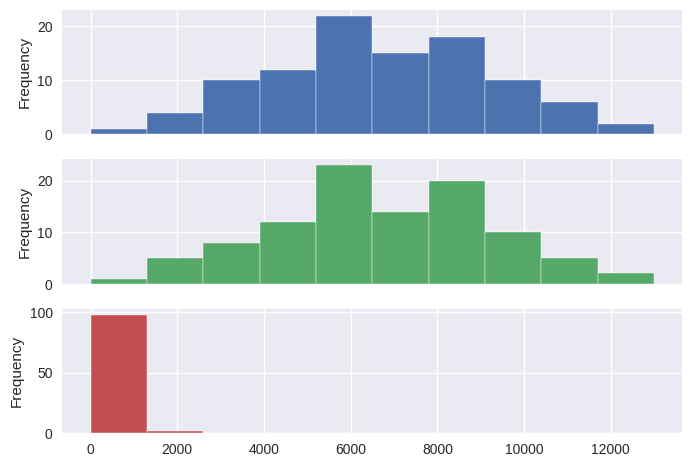

In [286]:
#plotting the actual,predicted & difference of SALES
plt.style.use('seaborn-v0_8')
dataset_rf.plot.hist(subplots=True, legend=False);

**As we can see that Actual, Prediction values are approximately closed to each other and there is no such significant variation in our plots**.

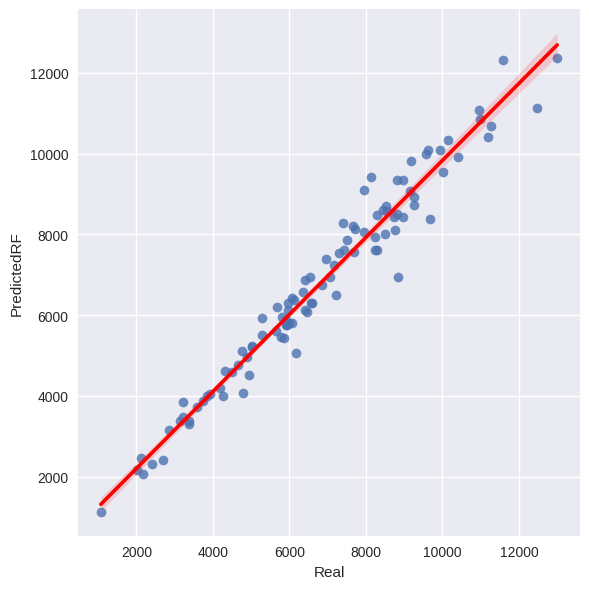

In [288]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'}, height=6, aspect=1);

**Feature Importance On Random Forest Regressor**

As we can see that Random Forest has the highest test score


In [289]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

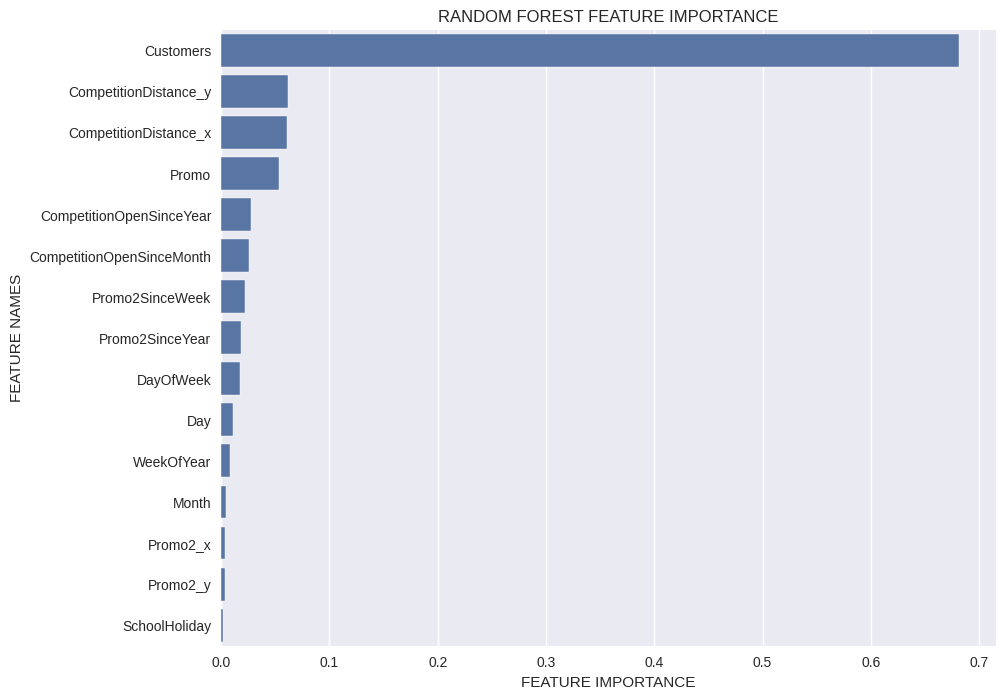

In [290]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

**Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction**.

In [291]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5]},index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression'])

# **Conclusion**

In [292]:
score_df

,Train_Score,Test_Score
Linear Regression,0.676302,0.676825
Lasso Regression,0.674571,0.675212
Decision Tree,1.000000,0.925130
Decision Tree(hyperparameters),0.965274,0.938749
Random Forest Regression,0.994734,0.963046


**Random Forest regressor achieved lowest MAPE as 5.65% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average**